In [1]:
# Scaling is necessary for KNN
# while using KNN always should take care for the follwing consideration : 
# choosing optimal k value 
# scaling feature 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('gene_expression.csv')

In [4]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [6]:
X = df.drop('Cancer Present',axis=1)

In [7]:
y= df['Cancer Present']

In [8]:
# to increase the system performance a polynomial feature is used
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly =PolynomialFeatures( include_bias = False , degree = 3 )

In [10]:
X = poly.fit_transform(X)

In [11]:
X.shape

(3000, 9)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3 , random_state=101)

In [14]:
# scaling 
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Using the knn model
from sklearn.neighbors import KNeighborsClassifier 

In [18]:
# it is possible to assign value to n_neighbors directly (knnmodel =  KNeighborsClassifier(n_neighbors) ) 
# but it better to find the optimal , So a loop will find it out.


In [19]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [20]:
test_error=[]
for k in range(1,30):
    model =  KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train , y_train)
    pred = model.predict(X_test)
    err = 1 - accuracy_score(y_test , pred)
    
    test_error.append(err)
    

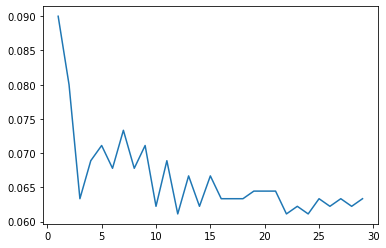

In [21]:
plt.plot(range(1,30),test_error);

In [22]:
# as the list index starting from 0 and that reffer to k = 1 
n = test_error.index(min(test_error)) + 1 
n

12

In [23]:
model =  KNeighborsClassifier(n_neighbors= n)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [24]:
pred = model.predict(X_test)
confusion_matrix(y_test, pred)

array([[397,  26],
       [ 29, 448]], dtype=int64)

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       423
           1       0.95      0.94      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [26]:
# 94 percent accuracy 